In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from scipy.stats import expon
import pandas as pd
from scipy.stats import binom

C:\Users\rajpu\AppData\Local\Temp\ipykernel_25256\3237141151.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  seaborn.lineplot(x=time_points, y=pdf_values,palette="pastel")


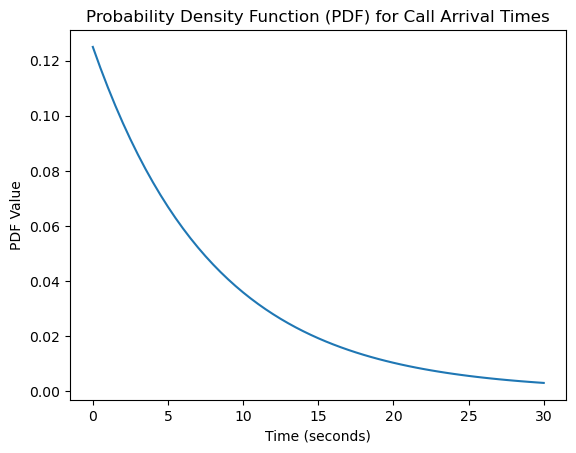

probability of the next call in 7 seconds: 0.0521


In [10]:

average_interval = 8.0
rate_parameter = 1 / average_interval
time_points = np.arange(0, 30.5, 0.5)
pdf_values = expon.pdf(time_points, scale=1 / rate_parameter)
seaborn.lineplot(x=time_points, y=pdf_values,palette="pastel")
plt.xlabel('Time (seconds)')
plt.ylabel('PDF Value')
plt.title('Probability Density Function (PDF) for Call Arrival Times')
plt.show()
time_of_interest = 7.0
probability_at_7_seconds = expon.pdf(time_of_interest, scale=1 / rate_parameter)
print(f"probability of the next call in 7 seconds: {probability_at_7_seconds:.4f}")


In [9]:
rate_parameter = 1 / 7
lower_bound = 5 
upper_bound = 8 
cdf_upper = 1 - np.exp(-rate_parameter * upper_bound)
cdf_lower = 1 - np.exp(-rate_parameter * lower_bound)
probability = cdf_upper - cdf_lower
print(f"The probability that the next earthquake happens between {lower_bound} and {upper_bound} weeks from now is approximately {probability:.4f}")


The probability that the next earthquake happens between 5 and 8 weeks from now is approximately 0.1706


In [12]:
df= pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/b/Lab 11.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [14]:
dup_data = df[df.duplicated()] 
dup_data.shape
df.drop_duplicates(inplace=True)
df.shape

(149, 5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


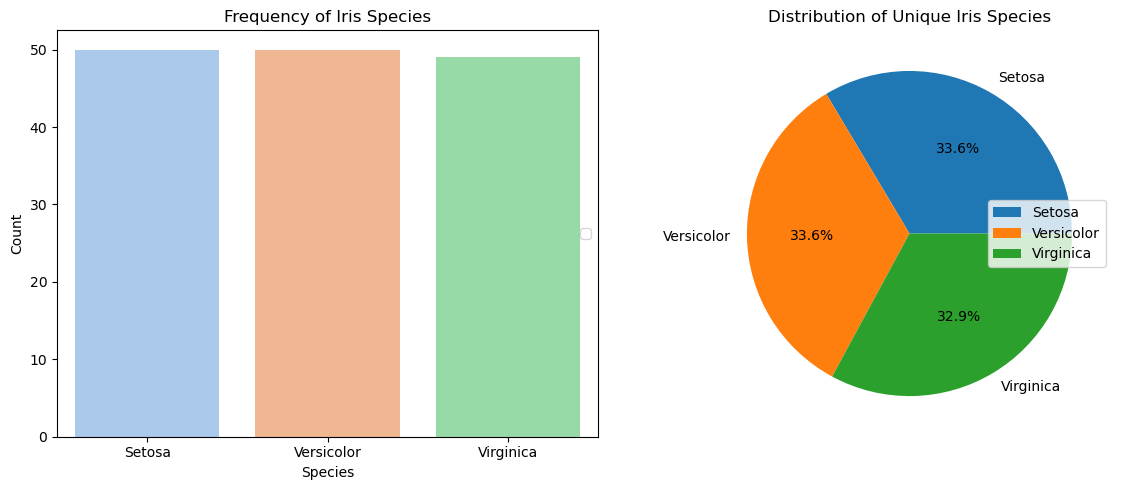

In [48]:
species_counts = df['variety'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(121)
seaborn.barplot(x=species_counts.index, y=species_counts.values,palette="pastel")
plt.title('Frequency of Iris Species')
plt.legend(loc='right')
plt.xlabel('Species')
plt.ylabel('Count')
unique_species = df.drop_duplicates(subset=['variety'])

plt.subplot(122)
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Unique Iris Species')
plt.tight_layout()
plt.legend(loc='right')
plt.show()

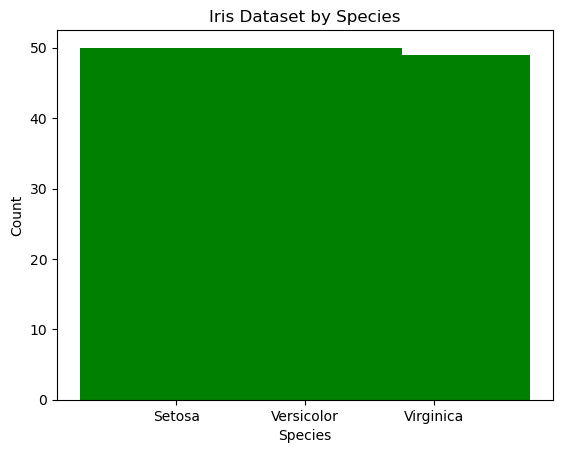

In [52]:
species_counts = df['variety'].value_counts()

plt.bar(species_counts.index, species_counts.values, color='green', width=1.5)

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Iris Dataset by Species')
plt.bar(species_counts.index, species_counts.values, color='green', width=1.5)

plt.show()


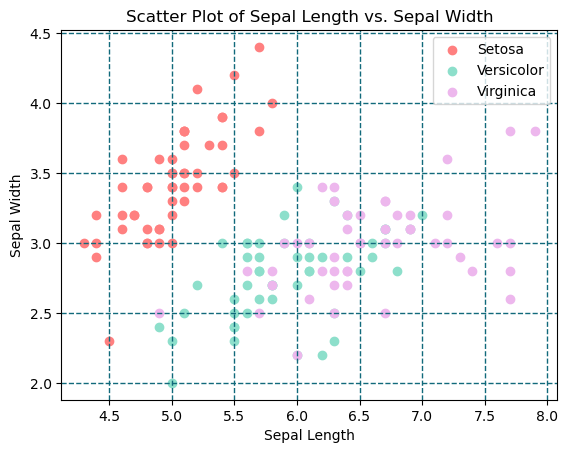

In [35]:
colors = {'Setosa': '#FF8080', 'Versicolor': '#8DDFCB', 'Virginica': '#EDB7ED'}

for species, color in colors.items():
    species_data = df[df['variety'] == species]
    plt.scatter(species_data['sepal.length'], species_data['sepal.width'], label=species, c=color)

plt.grid(True, color='#116A7B', linestyle='--', linewidth=1)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.legend()

plt.show()

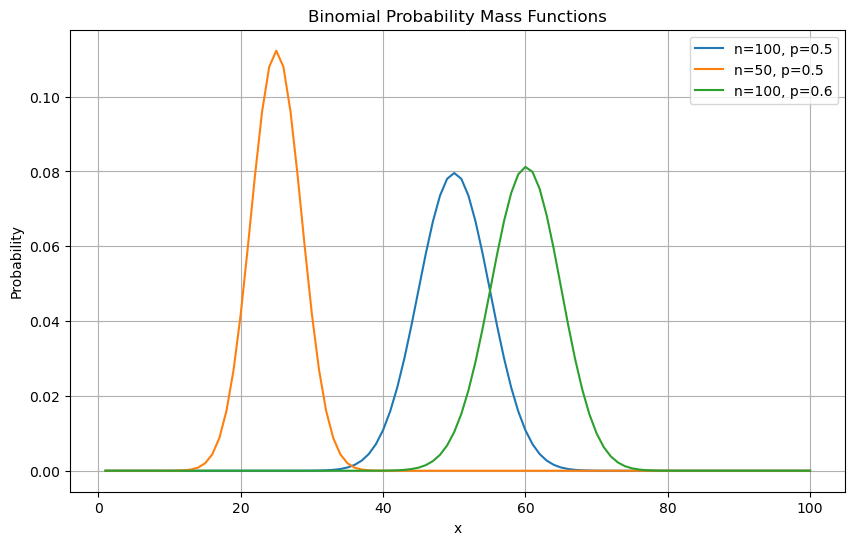

In [44]:
x = np.arange(1, 101)
n_values = [100, 50, 100]
p_values = [0.5, 0.5, 0.6]
y0 = binom.pmf(x, n_values[0], p_values[0])
y1 = binom.pmf(x, n_values[1], p_values[1])
y2 = binom.pmf(x, n_values[2], p_values[2])
data = {
    'x': np.tile(x, 3),
    'y': np.concatenate([y0, y1, y2]),
    'Distribution': ['n=100, p=0.5'] * len(x) + ['n=50, p=0.5'] * len(x) + ['n=100, p=0.6'] * len(x)
}
plt.figure(figsize=(10, 6))
seaborn.lineplot(data=data, x='x', y='y', hue='Distribution').set(title='Binomial Probability Mass Functions')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()